In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.spatial import ConvexHull

data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
# kolom target adalah nama2 bunga --> data.target_names = ['setosa' 'versicolor' 'virginica']
print(df.shape)

bucket = df[df['Target'] == 0] # membagi 3 dataset iris sesuai target (0, 1, 2)
bucket = bucket.iloc[:,[0,1]].values # mengambil atribut sepal width dan length lalu menjadikannya sbg array 2 dimensi

def partisiMatrixAbsisBased(M):
    '''
        Membagi matriks M[i][n] menjadi submatriks A[i..q][n] dan A[q+1..j][n]
        Masukan: matriks m x n dengan setiap elemennya terdiri dari 2 elemen (absis dan oordinat)
        Keluaran: submatriks A[i..q][n] dan A[q+1..j][n] dengan
                  A[i..q][n] lebih kecil dari A[q+1..j][n]
    '''
    pivot = M[(len(M) - 1) // 2][0] # ambil elemen tengah sbg pivot
    p = 0
    q = len(M) - 1
    while True:
        while (M[p][0] < pivot):
            p += 1
        # M[p][0] >= pivot
        while (M[q][0] > pivot):
            q -= 1
        # M[p][0] >= pivot
        if (p <= q):
            # swap
            temp = M[p][0]
            M[p][0] = M[q][0]
            M[q][0] = temp
            p += 1
            q -= 1
        if (p > q):
            break
    return q, M

df.head()
# output = partisiMatrixAbsisBased(bucket)
# print(output[0])
# print(output[1])


(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[[41 13]
 [36 41]
 [22 13]
 [22 32]
 [15 14]
 [15 32]
 [18 14]
 [18 36]]
[[35  0]
 [34  7]
 [34 35]
 [10  7]
 [10 18]
 [26  0]
 [26 18]]
[[19  6]
 [18 31]
 [18 19]
 [48  6]
 [17 31]
 [17 48]]


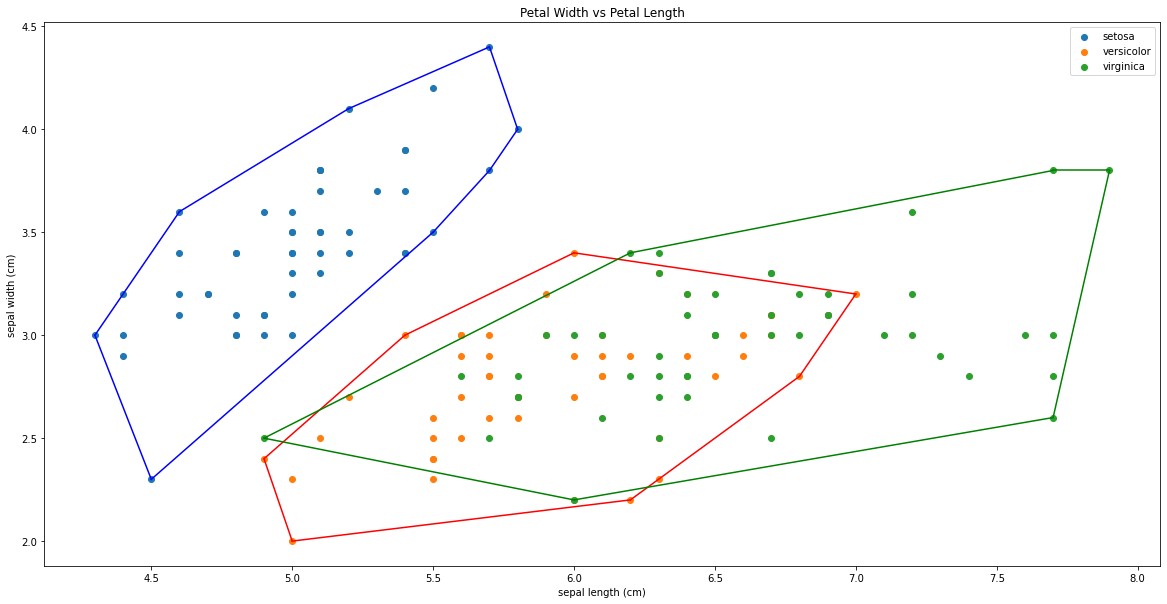

In [44]:
plt.figure(figsize = (20, 10))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')

# set label diagram
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

for i in range(len(data.target_names)): 
    bucket = df[df['Target'] == i] # membagi 3 dataset iris sesuai target (0, 1, 2)
    bucket = bucket.iloc[:,[0,1]].values # mengambil atribut sepal width dan length lalu menjadikannya sbg array 2 dimensi
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    print(hull.simplices)
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()